In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pyfftw as ft
import time

In [2]:
import pymp

ImportError: No module named pymp

In [2]:
N = 1024

In [3]:
u = ft.zeros_aligned((N,N,N), dtype='float32')
v = ft.zeros_aligned((N,N,N), dtype='float32')
w = ft.zeros_aligned((N,N,N), dtype='float32')

In [4]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')

In [5]:
ft.import_wisdom(wiz)

(True, True, True)

In [6]:
fo = ft.zeros_aligned((N,N,N), dtype='float32')

In [7]:
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [8]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.00693416595459


In [9]:
start = time.time()

ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.0154550075531


In [10]:
folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

vx = ft.zeros_aligned((N//nproc,N,N), dtype='float32')
vy = ft.zeros_aligned((N//nproc,N,N), dtype='float32')
vz = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-isotropic1024coarse-'+str(k)+'-(t=0.0).npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    if(int(content['nproc'])!=nproc):
        print("Unmatched number of processes. Must first pre-process to adequate number of process")
    
    vx[:,:,:] = content['vx']
    vy[:,:,:] = content['vy']
    vz[:,:,:] = content['vz']
    
    u[k*nx:(k+1)*nx,:,:] = vx[:,:,:]
    v[k*nx:(k+1)*nx,:,:] = vy[:,:,:]
    w[k*nx:(k+1)*nx,:,:] = vz[:,:,:]

In [13]:
start = time.time()

K = 0.5*(u**2+v**2+w**2)

np.multiply(u,u)

avgK = np.average(K)
del K

print("kinectic energy = "+str(avgK))

end = time.time()
print(end-start)

kinectic energy = 0.682724
27.4233310223


In [12]:
start = time.time()

K = 0.5*(np.multiply(u,u)+np.multiply(v,v)+np.multiply(w,w))

avgK = np.average(K)
del K

print("kinectic energy = "+str(avgK))

end = time.time()
print(end-start)

kinectic energy = 0.682724
28.0462310314


In [15]:
kx=np.zeros((N,N,N//2+1), dtype='complex64')
ky=np.zeros((N,N,N//2+1), dtype='complex64')

kz=np.zeros((N,N,N//2+1), dtype='complex64')
k2=np.zeros((N,N,N//2+1), dtype='complex64')

In [16]:
for i in range(N):
    kx[i,:,:]=(i+N//2)%N - N//2

for j in range(N):
    ky[:,j,:]=(j+N//2)%N - N//2

for k in range((N//2)+1):
    kz[:,:,k]=k 

k2[:,:,:] = kx[:,:,:]**2 + ky[:,:,:]**2 + kz[:,:,:]**2

In [22]:
cu = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
cv = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
cw = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [23]:
start = time.time()

fo[:,:,:] = u[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cu[:,:,:] = bo[:,:,:]

fo[:,:,:] = v[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cv[:,:,:] = bo[:,:,:]

fo[:,:,:] = w[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cw[:,:,:] = bo[:,:,:]

end = time.time()
print(end-start)

73.84565329551697


In [19]:
start = time.time()

cA11 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA12 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA13 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA21 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA22 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA23 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA31 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA32 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
cA33 = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')

end = time.time()
print(end-start)

22.159080266952515


In [20]:
start = time.time()

A11 = ft.zeros_aligned((N,N,N), dtype='float32')
A12 = ft.zeros_aligned((N,N,N), dtype='float32')
A13 = ft.zeros_aligned((N,N,N), dtype='float32')
A21 = ft.zeros_aligned((N,N,N), dtype='float32')
A22 = ft.zeros_aligned((N,N,N), dtype='float32')
A23 = ft.zeros_aligned((N,N,N), dtype='float32')
A31 = ft.zeros_aligned((N,N,N), dtype='float32')
A32 = ft.zeros_aligned((N,N,N), dtype='float32')
A33 = ft.zeros_aligned((N,N,N), dtype='float32')

end = time.time()
print(end-start)

24.291690587997437


In [ ]:
start = time.time()

bo[:,:,:] = np.complex64(0.0+1.0j)*kx[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A11[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*kx[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A12[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*kx[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A13[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*ky[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A21[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*ky[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A22[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*ky[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A23[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*kz[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A31[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*kz[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A32[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = np.complex64(0.0+1.0j)*kz[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A33[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

In [22]:
del cu,cv,cw
del cA11,cA12,cA13
del cA21,cA22,cA23
del cA31,cA32,cA33

In [24]:
A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):
    Aav = np.average(A[i])
    print("<"+la[i]+"> = "+str(Aav))

<A11> = 7.09406e-11
<A12> = -1.06901e-06
<A13> = 3.49764e-07
<A21> = 3.56522e-10
<A22> = 1.63254e-10
<A23> = 2.98314e-10
<A31> = 3.24079e-11
<A32> = 2.22422e-11
<A33> = -1.48601e-11


In [26]:
A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):
    A2av = np.average(A[i]**2)
    print("<"+la[i]+"^2> = "+str(A2av))

<A11^2> = 33.2612
<A12^2> = 66.9629
<A13^2> = 67.0284
<A21^2> = 65.7714
<A22^2> = 33.0683
<A23^2> = 65.7398
<A31^2> = 66.6281
<A32^2> = 66.7573
<A33^2> = 33.2179


In [28]:
A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):  
    A2av = np.average(A[i]**2)
    A3av = np.average(A[i]**3)
    print("skewness = <"+la[i]+"^3>/"+"<"+la[i]
                        +"^2>^(3/2) "+"= "+str(A3av/(A2av**(3/2))) )

skewness = <A11^3>/<A11^2>^(3/2) = -0.590251773528
skewness = <A12^3>/<A12^2>^(3/2) = -0.0262067516941
skewness = <A13^3>/<A13^2>^(3/2) = -0.0446005258717
skewness = <A21^3>/<A21^2>^(3/2) = -0.00580515886242
skewness = <A22^3>/<A22^2>^(3/2) = -0.553906859252
skewness = <A23^3>/<A23^2>^(3/2) = -0.0494109686469
skewness = <A31^3>/<A31^2>^(3/2) = 0.00386575772745
skewness = <A32^3>/<A32^2>^(3/2) = 0.00726894112207
skewness = <A33^3>/<A33^2>^(3/2) = -0.576312755204


In [30]:
div = A11+A22+A33 

div2av = np.average(div**2)

print("sqrt(<(div v)^2>) = "+str(np.sqrt(div2av)))

sqrt(<(div v)^2>) = 7.43725e-05


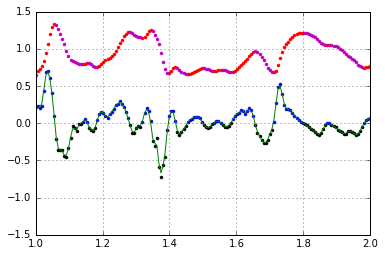

In [31]:
 vx_xl  =   u[:,0,0]
vx_xldx = A11[:,0,0]

pos = vx_xldx > 0
neg = vx_xldx < 0
scale = 30

Y = np.linspace(0,2.*np.pi,N,endpoint=False)
    
dx = 2.*np.pi/1024
vlgrx = np.gradient(vx_xl)/dx
    
plt.plot(Y[pos],vx_xl[pos],'r.')
plt.plot(Y[pos],vx_xldx[pos]/scale,'b.')
    
plt.plot(Y[neg],vx_xl[neg],'m.')
plt.plot(Y[neg],vx_xldx[neg]/scale,'k.')
    
plt.plot(Y,vlgrx/scale,'g')
plt.grid()
    
plt.xlim((1,2))
  
plt.show()

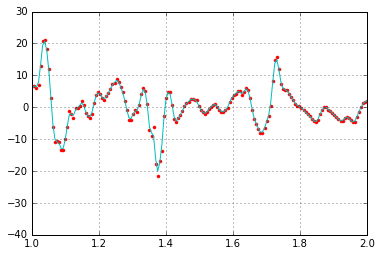

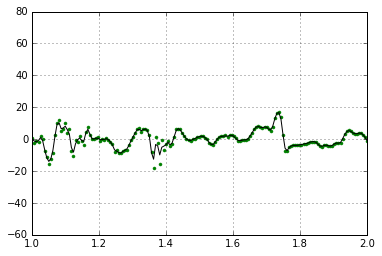

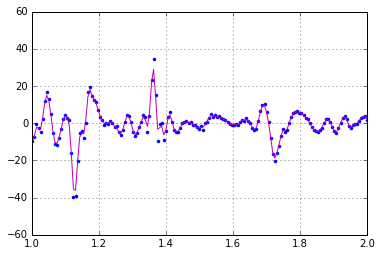

In [32]:
vx_xl   =   u[:,0,0]
vy_xl   =   v[:,0,0]
vz_xl   =   w[:,0,0]

vx_xldx = A11[:,0,0]
vy_xldx = A12[:,0,0]
vz_xldx = A13[:,0,0]

dx = (2.*np.pi)/N

vxlgrx = np.gradient(vx_xl)/dx
vylgrx = np.gradient(vy_xl)/dx
vzlgrx = np.gradient(vz_xl)/dx

pos = vx_xldx > 0
neg = vx_xldx < 0
scale = 30

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldx,'r.')
plt.plot(Y,vxlgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldx,'g.')
plt.plot(Y,vylgrx,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vz_xldx,'b.')
plt.plot(Y,vzlgrx,'m-')
    
plt.show()

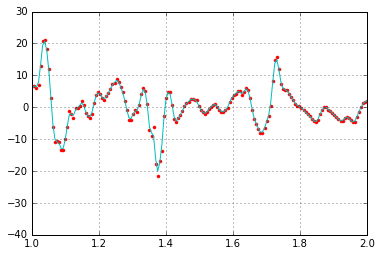

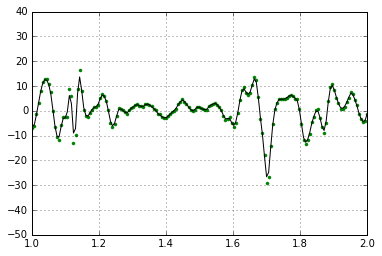

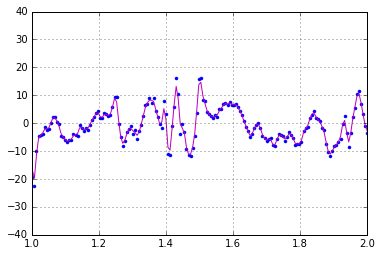

In [34]:
vx_xl   =   u[:,0,0]
vx_yl   =   u[0,:,0]
vx_zl   =   u[0,0,:]

vx_xldx = A11[:,0,0]
vx_xldy = A21[0,:,0]
vx_xldz = A31[0,0,:]

dx = (2.*np.pi)/N

vxlgrx = np.gradient(vx_xl)/dx
vxlgry = np.gradient(vx_yl)/dx
vxlgrz = np.gradient(vx_zl)/dx

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldx,'r.')
plt.plot(Y,vxlgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldy,'g.')
plt.plot(Y,vxlgry,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldz,'b.')
plt.plot(Y,vxlgrz,'m-')
    
plt.show()

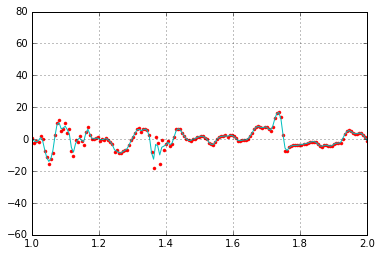

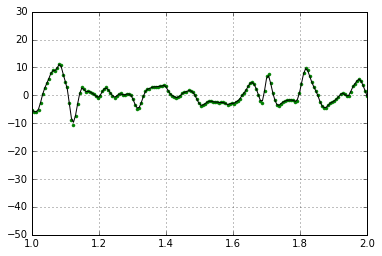

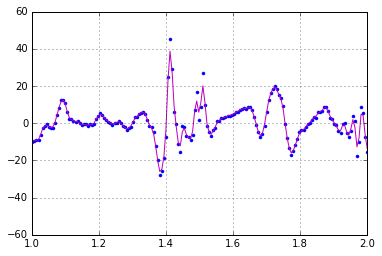

In [35]:
vy_xl   =   v[:,0,0]
vy_yl   =   v[0,:,0]
vy_zl   =   v[0,0,:]

vy_xldx = A12[:,0,0]
vy_xldy = A22[0,:,0]
vy_xldz = A32[0,0,:]

dx = (2.*np.pi)/N

vylgrx = np.gradient(vy_xl)/dx
vylgry = np.gradient(vy_yl)/dx
vylgrz = np.gradient(vy_zl)/dx

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldx,'r.')
plt.plot(Y,vylgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldy,'g.')
plt.plot(Y,vylgry,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldz,'b.')
plt.plot(Y,vylgrz,'m-')
    
plt.show()

In [36]:
Q = 0.5*( (A12*A21+A23*A32+A13*A31) - (A22*A33+A11*A33+A11*A22) )

In [37]:
avgQ = np.average(Q)
print("Average Q = "+str(avgQ))

Average Q = 1.10562e-07


In [38]:
R = A11**3 + A22**3 + A33**3 + 3*( A11*(A21*A12+A13*A31) + A22*(A12*A21+A23*A32) + A33*(A13*A31+A23*A32) + A13*A21*A32 + A12*A23*A31 )

In [39]:
avgQ2 = np.average(Q**2)

In [40]:
avgR = np.average(R)
print("<R>/<Q^2>^(3/2) = "+str(avgR/(avgQ2**1.5)))

<R>/<Q^2>^(3/2) = -1.64515941699e-09


In [41]:
del Q,R

In [42]:
Omega = 0.5*( A12**2 + A21**2 + A13**2 + A31**2 + A23**2 + A32**2 - 2.*(A12*A21+A13*A31+A23*A32) )

In [43]:
Epsilon  = A11**2 + A22**2 + A33**2 
Epsilon += 0.5*( A12**2 + A21**2 + A23**2 + A32**2 + A13**2 + A31**2 )
Epsilon += A12*A21 + A13*A31 + A23*A32

In [44]:
avgO = np.average(Omega)

In [45]:
avgE = np.average(Epsilon)

In [46]:
print("Average enstrophy: "+str(avgO))
print("Average strainrate: "+str(avgE))
print("Average strainrate - enstrophy: "+str(avgE-avgO))
print("Normalized strainrate - enstrophy: "+str((avgE-avgO)/avgO))

Average enstrophy: 249.218
Average strainrate: 249.219
Average strainrate - enstrophy: 0.000198364
Normalized strainrate - enstrophy: 7.95946e-07


In [47]:
del Omega,Epsilon

In [48]:
nu = 0.000185
eps = 2*nu*avgE

In [49]:
urms = np.sqrt(2.*avgK/3)
lamb = np.sqrt(15.*nu/eps)*urms
ReTayor = urms*lamb/nu
print("nu = "+str(nu))
print("urms = "+str(urms)+", Reference: 0.6820399")
print("eps = "+ str(eps))
print("kinectic energy = "+str(avgK))
print("Taylor micro-scale ="+str(lamb))
print("ReLamb = "+str(ReTayor)+", Reference: 426.8378")

nu = 0.000185
urms = 0.674647385131, Reference: 0.6820399
eps = 0.0922108753967
kinectic energy = 0.682724
Taylor micro-scale =0.117035405083
ReLamb = 426.798000038, Reference: 426.8378
